# Aula 02 - Parte 02

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

# Exercício 1
**Objetivo: entender o sistema presa-predador linear**

Uma situação que acontece na natureza é que alguns seres vivos são predadores de outros. Por exemplo: o [carcará](https://pt.wikipedia.org/wiki/Carcar%C3%A1), uma ave de rapina sul-americana parecida com um falcão, se alimenta de sapos, e, por isso, dizemos que o carcará é um *predador* do sapo. Nessa relação, o carcará é o *predador* e o sapo é a *presa*. Nosso objetivo, neste exercício, é encontrar como a quantidade de carcarás e de sapos varia com o tempo.

Na nossa simulação, o tempo é medido em meses (veja que $t$ será sempre um número inteiro!). Vamos usar a variável $c$ para representar o número de carcarás na população, e $s$ para representar o número de sapos. Então, $c_t$ é o número de carcarás no tempo $t$, e $s_t$ é o número de sapos no tempo $t$. Como cada carcará come muitos sapos, vamos convencionar que $c$ está em unidades e $s$ está em milhares.

Vamos assumir alguns comportamentos 

* A população de carcarás naturalmente cai em 20% a cada mês
* Para cada cinco mil sapos existentes naquele mês, um novo carcará nasce
* A população de sapos naturalmente sobe em 10% porque eles se reproduzem
* A cada mês, cada carcará consegue comer 100 sapos

Isso significa que podemos escrever equações para calcular o número de carcarás e de sapos a cada mês, tomando por base a quantidade deles no mês anterior:

$$ 
\begin{cases}
    \begin{aligned}
    c_t & = 0.8 c_{t-1} + 0.2 s_{t-1} \\
    s_t & = - 0.1 c_{t-1} + 1.1 s_{t-1} \\
    \end{aligned}
\end{cases}
$$

1. Complete a função abaixo para simular a mudança populacional a cada mês por um período de 10 anos
2. Simule a mudança populacional para as as condições iniciais: $(c_0=10, s_0=100)$, $(c_0=6, s_0=5)$, $(c_0=10.3, s_0=10.3)$, $(c_0=10, s_0=10)$. O que acontece em cada um desses casos?
3. O que acontece com as populações se os gaviões começarem a comer mais e mais?
4. O que acontece com as populações se os sapos passarem a se reproduzir menos?

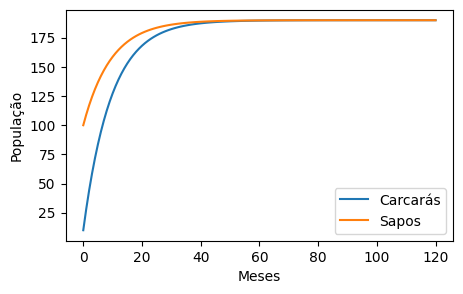

In [8]:

def executar_modelo(c, s, meses=120):
    # Faça sua função aqui, implementando as equações do sistema!
    c_mes_passado = c
    s_mes_passado = s
    c_list = [c]
    s_list = [s]
    for i in range(meses):
        c_este_mes = 0.8 * c_mes_passado + 0.2 * s_mes_passado
        s_este_mes = -0.1 * c_mes_passado + 1.1 * s_mes_passado
        c_mes_passado = c_este_mes
        s_mes_passado = s_este_mes
        c_list.append(c_este_mes)
        s_list.append(s_este_mes)
        
    return c_list, s_list


c_list, s_list = executar_modelo(c=10, s=100, meses=120)


plt.figure(figsize=(5,3))
plt.plot(c_list, label='Carcarás')
plt.plot(s_list, label='Sapos')
plt.xlabel('Meses')
plt.ylabel('População')
plt.legend()
plt.show()

# Exercício 2
**Objetivo: escrever um sistema dinâmico linear em seu formato matricial**

Uma maneira de escrever o sistema de equações que usamos no exercício anterior é usando a forma matricial:

$$
\begin{bmatrix}
    c_t \\
    s_t 
\end{bmatrix}
=
\begin{bmatrix}
    0.8 & 0.2\\
    -0.1 & 1.1
\end{bmatrix} 
\begin{bmatrix}
    c_{t-1} \\
    s_{t-1}
\end{bmatrix}
$$

1. Realize manualmente o cálculo acima e verifique que essa formulação matricial é equivalente ao sistema de equações
2. Com essa formulação, o cálculo das populações no mês seguinte passa a ser uma multiplicação matricial. Reformule a função `executar_modelo` para que ela opere diretamente com matrizes e vetores. Teste sua nova função para confirmar que tem os mesmos resultados da versão anterior.



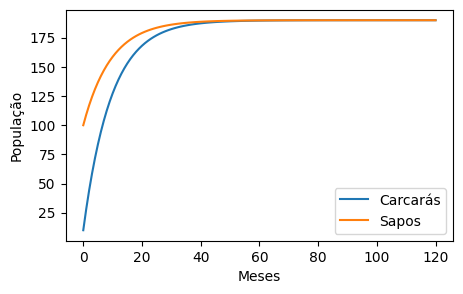

In [9]:

def executar_modelo(c, s, meses=120):
    # Faça sua função aqui, implementando as equações do sistema!
    populacoes_mes_passado = np.array( [[c], [s]] )
    A = np.array([ [0.8, 0.2], [-.1, 1.1]])
    
    c_list = [c]
    s_list = [s]
    for i in range(meses):
        populacao_este_mes = A @ populacoes_mes_passado
        c_list.append(populacao_este_mes[0,0])
        s_list.append(populacao_este_mes[1,0])
        populacoes_mes_passado = populacao_este_mes
        
    return c_list, s_list


c_list, s_list = executar_modelo(c=10, s=100, meses=120)
 

plt.figure(figsize=(5,3))
plt.plot(c_list, label='Carcarás')
plt.plot(s_list, label='Sapos')
plt.xlabel('Meses')
plt.ylabel('População')
plt.legend()
plt.show()

In [5]:
A = np.array([ [0.8, 0.2], [-.1, 1.1]])
A12 = A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A

x = np.array([[10], [100]])

x_ = x 
for i in range(12):
    x_ = A@x_
print(x_)

print(A12 @ x)

[[139.16268343]
 [164.58134172]]
[[139.16268343]
 [164.58134172]]


In [6]:
x = np.array( [ [10, 50], [100, 90]])
print(x)

A @ x

[[ 10  50]
 [100  90]]


array([[ 28.,  58.],
       [109.,  94.]])

# Exercício 3
**Objetivo: usar a multiplicação matricial para executar várias simulações paralelamente**

Uma possível ideia para simular diversas condições iniciais simultaneamente é usar uma matriz de condições iniciais com uma coluna para cada condição inicial, isto é, algo como:
$$
\begin{bmatrix}
    c^{(1)}_{t} & c^{(2)}_{t} & c^{(3)}_{t} \\
    s^{(1)}_{t} & s^{(2)}_{t} & s^{(3)}_{t} 
\end{bmatrix}=
\begin{bmatrix}
    0.8 & 0.2\\
    -0.1 & 1.1
\end{bmatrix} 
\begin{bmatrix}
    c^{(1)}_{t-1} & c^{(2)}_{t-1} & c^{(3)}_{t-1} \\
    s^{(1)}_{t-1} & s^{(2)}_{t-1} & s^{(3)}_{t-1} 
\end{bmatrix}
$$

1. Realize manualmente (no papel) a multiplicação acima. Evidencie como cada coluna da matriz do lado esquerdo da equação depende somente das colunas correspondentes na matriz de entradas no lado direito da equação, isto é, $c^{(2)}$, por exemplo, não influencia $c^{(1)}$.
2. Execute todas as simulações de variações do problema que fizemos nos ítens anteriores, mas agora usando a formulação matricial para simularmos todos simultaneamente.


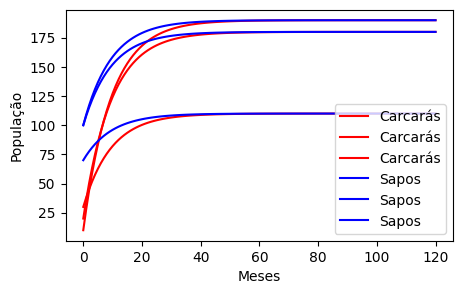

In [10]:
def executar_modelo(c : list[float], s : list[float], meses=120):
    # Faça sua função aqui, implementando as equações do sistema!
    populacoes_mes_passado = np.array( [c, s] )
    
    A = np.array([ [0.8, 0.2], [-.1, 1.1]])
    
    c_list = [np.array(c)]
    s_list = [np.array(s)]
    for i in range(meses):
        populacao_este_mes = A @ populacoes_mes_passado
        
        c_list.append(populacao_este_mes[0,:])
        s_list.append(populacao_este_mes[1,:])
        
        populacoes_mes_passado = populacao_este_mes
        
    return c_list, s_list


c_list, s_list = executar_modelo(c=[10, 20, 30], s=[100, 100, 70], meses=120)

c_list = np.array(c_list)
s_list = np.array(s_list)

plt.figure(figsize=(5,3))
plt.plot(c_list, 'r', label='Carcarás')
plt.plot(s_list, 'b', label='Sapos')
plt.xlabel('Meses')
plt.ylabel('População')
plt.legend()
plt.show()

# Exercício 4
**Objetivo: entender o processo de transposição de matrizes**

Você deve ter percebido que na etapa 1 desta aula usamos as linhas de uma matriz para representar cada um dos nossos elementos, ao passo que agora temos colunas representando esses mesmos elementos. Na verdade, podemos optar por qualquer uma das representações, e para isso usamos uma operação chamada "transposição". Na transposição, as linhas de uma matriz se tornam colunas e vice-versa, isto é, se uma matriz $X$ tem elementos $x[i,j]$, então a matriz transposta $X^T$ tem elementos $x^T[i,j] = x[j,i]$. Por exemplo:
$$
X =
\begin{bmatrix}
    a & b & c\\
    d & e & f
\end{bmatrix} \rightarrow
X^T =
\begin{bmatrix}
    a & d\\
    b & e\\
    c & f
\end{bmatrix}
$$

É claro que a transposta da transposta de uma matriz é a própria matriz original:
$$
X^{T^T} = X
$$

A transposição de matrizes tem uma propriedade muito importante, que é a de possibilitar inverter a ordem das matrizes em uma multiplicação:
$$
(AB)^T = B^T A^T
$$

1. Em nossa simulação de carcarás e sapos, utilizamos a forma: $Y=AX$. Identifique as matrizes $Y$, $A$ e $X$.
2. Na representação atual, os elementos de $Y$ são suas colunas. Podemos transpor os dois lados da equação e obter: $Y^T = (AX)^T$. Use as propriedades da transposição de matrizes para simplificar essa equação e permitir que $Y^T$ seja encontrado usando somente uma multiplicação matricial.
3. Altere sua função `executar_modelo` para que ela passe a operar com a forma transposta de seu problema.